In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [2]:
img_height, img_width = 180,180

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)
training_set=train_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/Dataset/Full/train',
                                              target_size = (img_height,img_width),
                                              class_mode = 'categorical',
                                              batch_size=16)

Found 1852 images belonging to 11 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=train_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/Dataset/Full/test',
                                              target_size=(img_height,img_width),
                                              class_mode='categorical',
                                              batch_size=16)

Found 910 images belonging to 11 classes.


In [5]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                 input_shape=(180,180,3),
                                                 pooling='avg', classes=2,
                                                 weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(11, activation='softmax'))

In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 11)                5643      
                                                                 
Total params: 24,642,443
Trainable params: 1,054,731
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
resnet_model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

C:\Users\karma\.conda\envs\FarmwiseAI\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
epochs=10
history = resnet_model.fit(training_set, validation_data=test_set, epochs=epochs)

Epoch 1/10
116/116 [==============================] - 1552s 13s/step - loss: 2.8050 - accuracy: 0.1501 - auc: 0.6478 - precision: 0.1688 - recall: 0.0146 - true_positives: 27.0000 - val_loss: 2.5944 - val_accuracy: 0.1099 - val_auc: 0.5819 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/10
116/116 [==============================] - 1540s 13s/step - loss: 2.1744 - accuracy: 0.1523 - auc: 0.6737 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - val_loss: 2.5606 - val_accuracy: 0.1077 - val_auc: 0.5729 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 3/10
116/116 [==============================] - 1571s 14s/step - loss: 2.1348 - accuracy: 0.1830 - auc: 0.7128 - precision: 0.0000e+00 - recall: 0.0000e+00 - true_positives: 0.0000e+00 - val_loss: 2.3203 - val_accuracy: 0.0879 - val_auc: 0.6326 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00


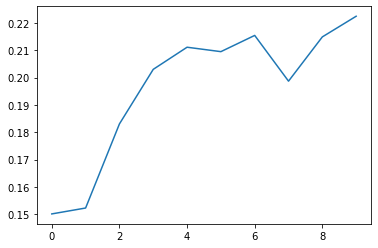

In [10]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()